In [ ]:
!pip install anvil-uplink

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
import anvil.server

In [ ]:
anvil.server.connect("ZFCHWXYYVNKLFUZQJ3Q2LK3E-OYMCSYAFJ3RQ6BIE")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving month3_viz.csv to month3_viz (1).csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import pickle
from datetime import datetime
import datetime
import anvil.tables as tables
from anvil.tables import app_tables
import anvil.media

In [ ]:
data = pd.read_csv("month3_viz.csv")

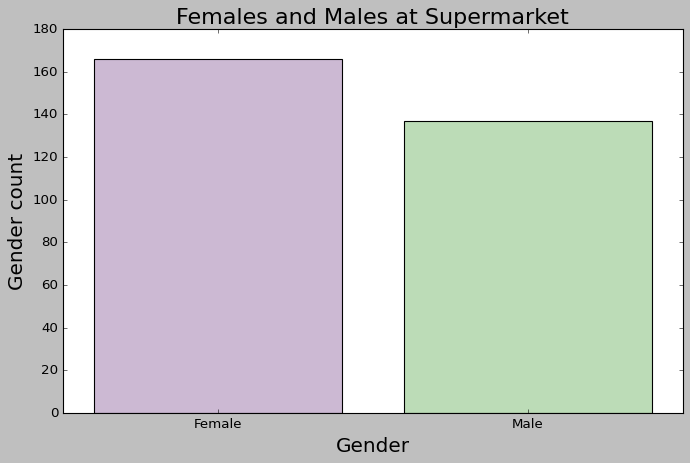

In [ ]:
# Plot comapring number of female and male customers at the super market
plt.figure(figsize=(10,6))
plt.style.use('classic')
ax= sns.countplot(x="Gender", data=data , palette = 'PRGn')
ax.set_xlabel(xlabel= "Gender",fontsize=18)
ax.set_ylabel(ylabel = "Gender count", fontsize = 18)
ax.set_title(label = "Females and Males at Supermarket", fontsize = 20)
# plt.show()
plt.savefig('plot1')

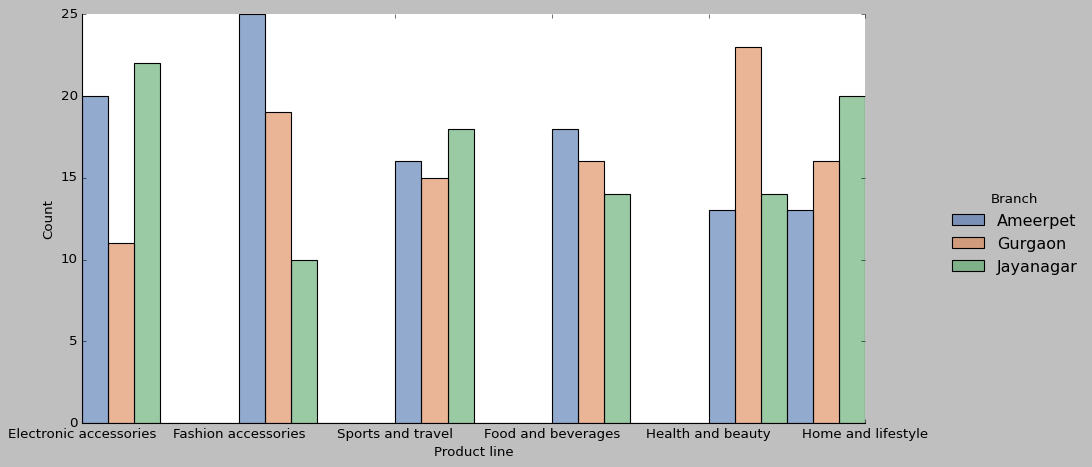

In [ ]:
# Visualizing which product is best selling at which branches
ax=sns.color_palette("Wistia")
ax=sns.set_palette("deep")
ax=sns.displot(data, x="Product line", hue="Branch",height=6, aspect=2, alpha=0.6, multiple="dodge", discrete=False)
# ax.set_title(label = "Comparison of sales of product types at 3 branches", fontsize = 20)
plt.savefig('plot2')

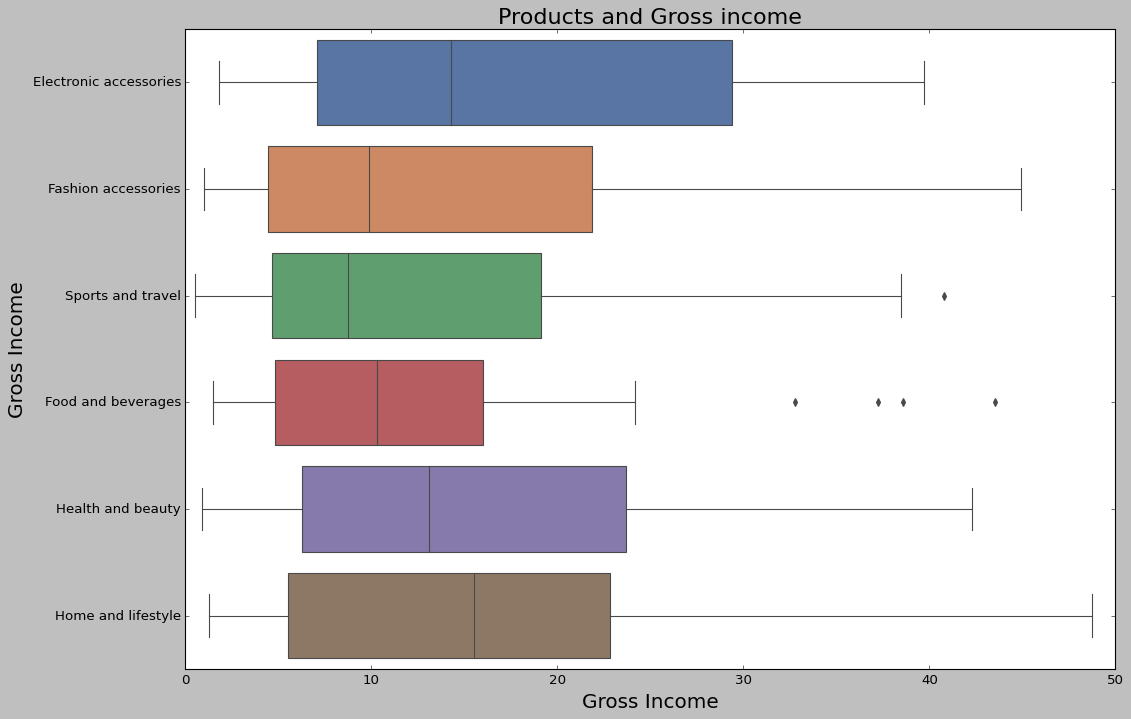

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.color_palette("Set3")
ax=sns.set_palette("deep")
ax=sns.boxplot(data=data, y="Product line", x= "gross income")
ax.set_xlabel(xlabel="Gross Income", fontsize=18)
ax.set_ylabel(ylabel="Gross Income", fontsize=18)
ax.set_title(label="Products and Gross income", fontsize=20)
ax.set(xlim=(0, 50))
plt.savefig('plot3')

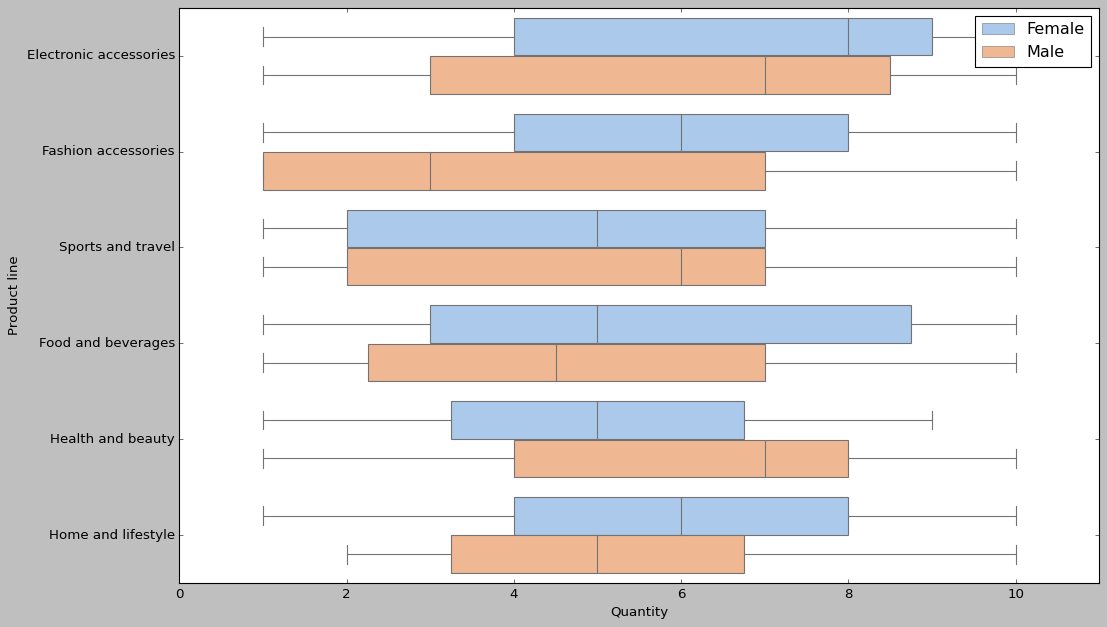

In [ ]:
# Using multiple data columns to extract more meaning into the Visualization
plt.figure(figsize = (14,8))
plt.style.use('classic')
ax=sns.color_palette("Wistia")
ax=sns.set_palette("pastel")
ax = sns.boxplot(data=data, y="Product line", x= "Quantity", hue="Gender")
plt.legend(loc="upper right")
ax.set(xlim=(0, 11))
plt.tight_layout()
plt.savefig('plot4')

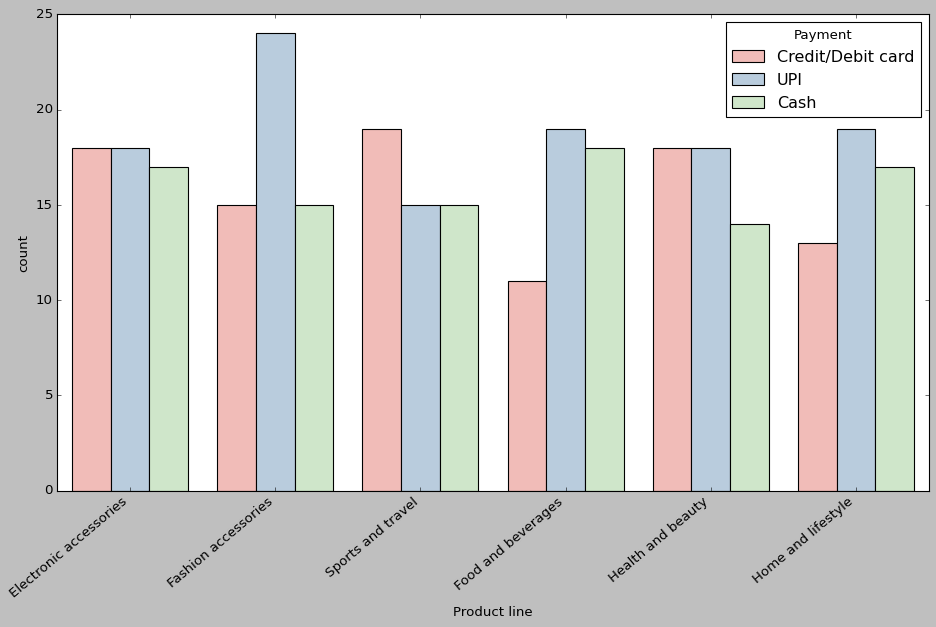

In [ ]:
plt.figure(figsize=(12,8))
ax=sns.color_palette("Pastel2_r")
ax=sns.set_palette("deep")
ax=sns.countplot(data=data, x = "Product line", hue="Payment", palette="Pastel1")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.savefig('plot5')

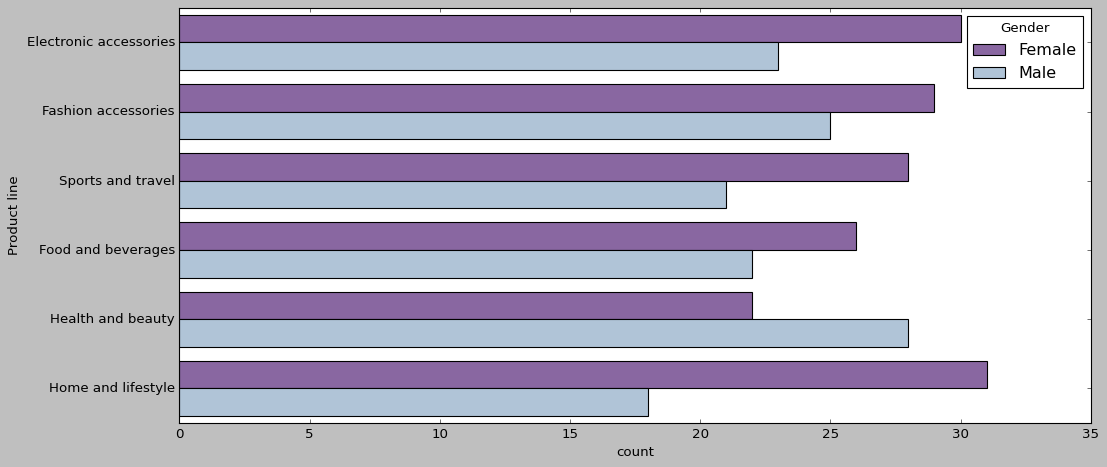

In [ ]:
plt.figure(figsize=(14,6))
# sns.countplot(y='Product line', data=data, order = data['Product line'].value_counts().index, palette="tab20b")
sns.countplot(y='Product line', hue="Gender", data=data, palette="BuPu_r")
plt.tight_layout()
plt.savefig("plot6")

In [ ]:
from PIL import Image
import io

In [ ]:
@anvil.server.callable
def plot1():
  #plot1
  image_object_1=Image.open('/content/plot1.png')
  image1 = image_object_1.convert('RGB')
  bs1 = io.BytesIO()
  name1 = "Insight1"
  image1.save(bs1, format="JPEG")
  # plot2
  image_object_2 = Image.open('/content/plot2.png')
  image2 = image_object_2.convert('RGB')
  bs2 = io.BytesIO()
  name2 = 'Insight2'
  image2.save(bs2, format="JPEG")
  #plot3
  image_object_3 = Image.open('/content/plot3.png')
  image3 = image_object_3.convert('RGB')
  bs3 = io.BytesIO()
  name3 = "Insight3"
  image3.save(bs3, format="JPEG")
  #plot4
  image_object_4 = Image.open('/content/plot4.png')
  image4 = image_object_4.convert('RGB')
  bs4 = io.BytesIO()
  name4 = "Insight4"
  image4.save(bs4, format="JPEG")
  #plot5
  image_object_5 = Image.open('/content/plot5.png')
  image5 = image_object_5.convert('RGB')
  bs5 = io.BytesIO()
  name5 = "Insight5"
  image5.save(bs5, format="JPEG")
  #plot6
  image_object_6 = Image.open('/content/plot6.png')
  image6 = image_object_6.convert('RGB')
  bs6 = io.BytesIO()
  name6 = "Insight6"
  image6.save(bs6, format="JPEG")
  return [anvil.BlobMedia("image/jpeg", bs1.getvalue(), name=name1), anvil.BlobMedia("image/jpeg", bs2.getvalue(), name=name2), anvil.BlobMedia("image/jpeg", bs3.getvalue(), name=name3), anvil.BlobMedia("image/jpeg", bs4.getvalue(), name=name4), anvil.BlobMedia("image/jpeg", bs5.getvalue(), name=name5), anvil.BlobMedia("image/jpeg", bs6.getvalue(), name=name6)]


In [ ]:
anvil.server.wait_forever()